# Setup + Import Data

In [79]:
import pandas as pd

data = [
    ["17/11/2020", "Tanzania", "Tunisia", 1, 1, "Africa Cup of Nations Qualification"],
    ["13/11/2020", "Tunisia", "Tanzania", 1, 0, "Africa Cup of Nations Qualification"]
]

df = pd.DataFrame(data, columns=["date","home_team","away_team","home_score","away_score","tournament"])

# filtrer matchs de Tunisie
df_tunisie = df[(df["home_team"] == "Tunisia") | (df["away_team"] == "Tunisia")].copy()

# définir opponent
df_tunisie["opponent"] = df_tunisie.apply(
    lambda row: row["away_team"] if row["home_team"] == "Tunisia" else row["home_team"],
    axis=1
)

print(df_tunisie[["home_team","away_team","opponent"]])
print("Unique opponents:", df_tunisie["opponent"].unique())


  home_team away_team  opponent
0  Tanzania   Tunisia  Tanzania
1   Tunisia  Tanzania  Tanzania
Unique opponents: ['Tanzania']


# Filtrage : Tunisie

In [ ]:
df_tunisie = df[(df["home_team"] == "Tunisia") | (df["away_team"] == "Tunisia")]
df_tunisie.shape
df_tunisie.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4474,1957-06-02,Tunisia,Libya,4,2,Friendly,Tunis,Tunisia,False
4651,1958-05-09,Tunisia,Libya,4,1,Friendly,Tunis,Tunisia,False
4812,1959-03-08,Tunisia,Malta,0,0,Friendly,Tunis,Tunisia,False
4986,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,False
5065,1960-06-05,Tunisia,Iraq,2,1,Friendly,Tunis,Tunisia,False


#

# Focus sur 5 dernières années

In [ ]:
df_tunisie["date"] = pd.to_datetime(df_tunisie["date"])
df_tunisie = df_tunisie[df_tunisie["date"] >= "2020-01-01"]
df_tunisie.tail()


C:\Users\log\AppData\Local\Temp\ipykernel_10392\2868963960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tunisie["date"] = pd.to_datetime(df_tunisie["date"])


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
48744,2025-11-14,Tunisia,Jordan,3,2,Friendly,Radès,Tunisia,False
48824,2025-11-18,Brazil,Tunisia,1,1,Friendly,Lille,France,True
48860,2025-12-01,Tunisia,Syria,0,1,Arab Cup,Al Rayyan,Qatar,True
48868,2025-12-04,Palestine,Tunisia,2,2,Arab Cup,Lusail,Qatar,True
48876,2025-12-07,Qatar,Tunisia,0,3,Arab Cup,Al Khor,Qatar,False


In [ ]:
df_tunisie.shape
df_tunisie.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43436,2020-10-09,Tunisia,Sudan,3,0,Friendly,Radès,Tunisia,False
43492,2020-10-13,Nigeria,Tunisia,1,1,Friendly,Sankt Veit an der Glan,Austria,True
43577,2020-11-13,Tunisia,Tanzania,1,0,African Cup of Nations qualification,Radès,Tunisia,False
43655,2020-11-17,Tanzania,Tunisia,1,1,African Cup of Nations qualification,Dar es Salaam,Tanzania,False
43756,2021-03-25,Libya,Tunisia,2,5,African Cup of Nations qualification,Benina,Libya,False


# Resultats des matchs


In [ ]:
def match_result(row):
    if row['home_team'] == 'Tunisia':
        if row['home_score'] > row['away_score']:
            return "Win"
        elif row['home_score'] < row['away_score']:
            return "Loss"
        else:
            return "Draw"
    else:
        if row['away_score'] > row['home_score']:
            return "Win"
        elif row['away_score'] < row['home_score']:
            return "Loss"
        else:
            return "Draw"

df_tunisie['result'] = df_tunisie.apply(match_result, axis=1)


# Répartition Win / Draw / Loss

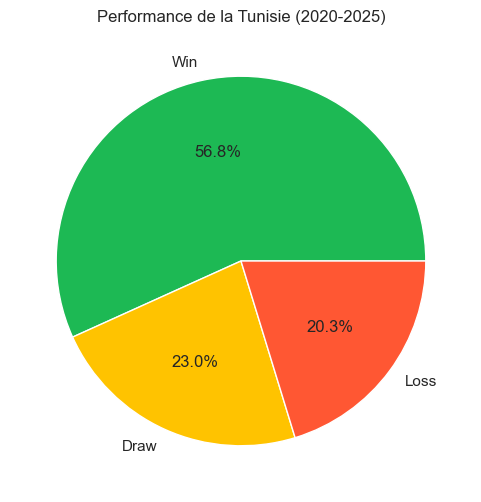

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6,6))

df_tunisie['result'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#1DB954', '#FFC300', '#FF5733'],
    labels=['Win', 'Draw', 'Loss']
)

plt.title("Performance de la Tunisie (2020-2025)")
plt.ylabel("")
plt.show()


+ Entre 2020 et 2025, la Tunisie a remporté plus de 56% de ses matchs internationaux.
+ Seuls 20% se terminent par une défaite → équipe globalement solide
+ Les matchs nuls représentent 23% 

# Performance par année

In [ ]:
df_tunisie['year'] = df_tunisie['date'].dt.year

results_by_year = df_tunisie.groupby(['year', 'result']).size().unstack(fill_value=0)
results_by_year


result,Draw,Loss,Win
year,,,
2020,2,0,2
2021,1,4,12
2022,3,5,9
2023,1,2,6
2024,7,2,4
2025,3,2,9


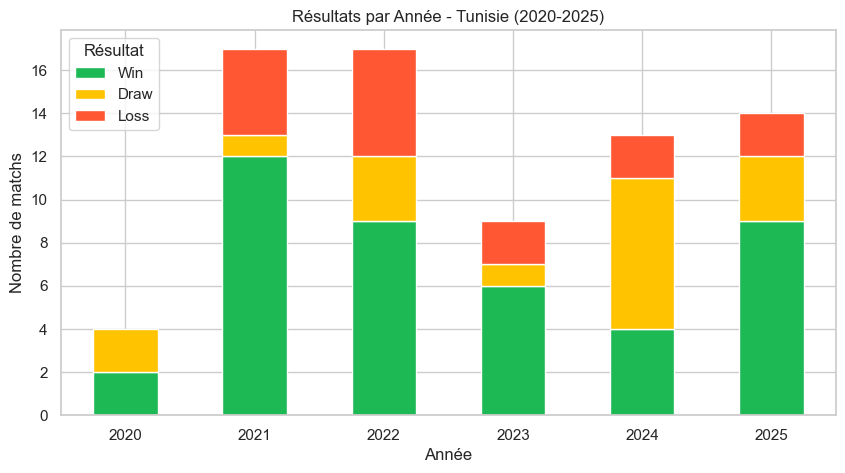

In [ ]:

results_by_year = results_by_year[['Win', 'Draw', 'Loss']]
results_by_year
results_by_year.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    color=['#1DB954', '#FFC300', '#FF5733']
)

plt.title("Résultats par Année - Tunisie (2020-2025)")
plt.xlabel("Année")
plt.ylabel("Nombre de matchs")
plt.legend(title="Résultat")
plt.xticks(rotation=0)
plt.show()


# Différence de buts par match → Attaque vs Défense

In [ ]:
df_tunisie

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year
43436,2020-10-09,Tunisia,Sudan,3,0,Friendly,Radès,Tunisia,False,Win,2020
43492,2020-10-13,Nigeria,Tunisia,1,1,Friendly,Sankt Veit an der Glan,Austria,True,Draw,2020
43577,2020-11-13,Tunisia,Tanzania,1,0,African Cup of Nations qualification,Radès,Tunisia,False,Win,2020
43655,2020-11-17,Tanzania,Tunisia,1,1,African Cup of Nations qualification,Dar es Salaam,Tanzania,False,Draw,2020
43756,2021-03-25,Libya,Tunisia,2,5,African Cup of Nations qualification,Benina,Libya,False,Win,2021
...,...,...,...,...,...,...,...,...,...,...,...
48744,2025-11-14,Tunisia,Jordan,3,2,Friendly,Radès,Tunisia,False,Win,2025
48824,2025-11-18,Brazil,Tunisia,1,1,Friendly,Lille,France,True,Draw,2025
48860,2025-12-01,Tunisia,Syria,0,1,Arab Cup,Al Rayyan,Qatar,True,Loss,2025
48868,2025-12-04,Palestine,Tunisia,2,2,Arab Cup,Lusail,Qatar,True,Draw,2025


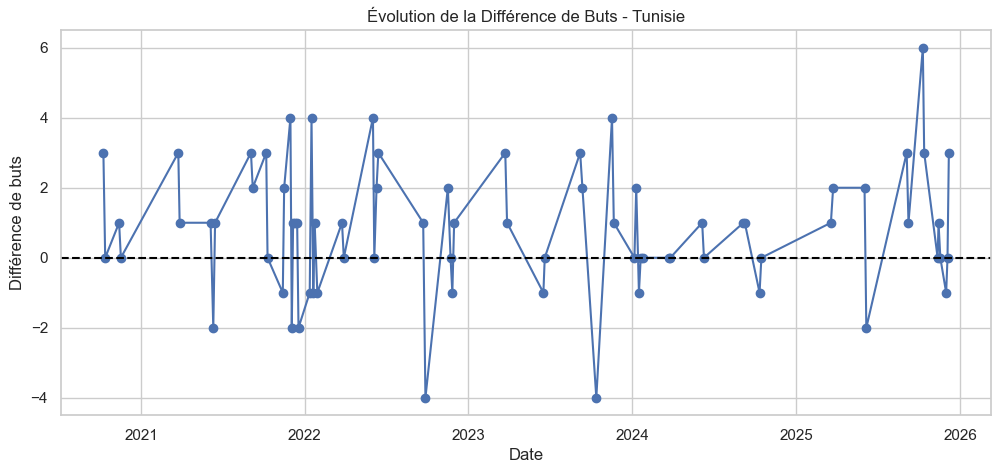

In [ ]:
# Calcul de la différence de buts pour la Tunisie
df_tunisie['goal_diff'] = df_tunisie.apply(
    lambda row: row['home_score'] - row['away_score'] if row['home_team'] == 'Tunisia'
    else row['away_score'] - row['home_score'], axis=1)

# Courbe d'évolution
plt.figure(figsize=(12,5))
plt.plot(df_tunisie['date'], df_tunisie['goal_diff'], marker='o')
plt.axhline(0, color='black', linestyle='--')

plt.title("Évolution de la Différence de Buts - Tunisie")
plt.xlabel("Date")
plt.ylabel("Différence de buts")
plt.grid(True)
plt.show()


- La différence de buts de la Tunisie depuis 2020 est positivement orientée
- Beaucoup plus de matchs où la Tunisie marque plus qu’elle n’encaisse
- 2021-2022 : forte dynamique offensive → +3 / +4 réguliers
- Fin 2025  : très bon rebond avec pics à +6


# Performance selon la compétition

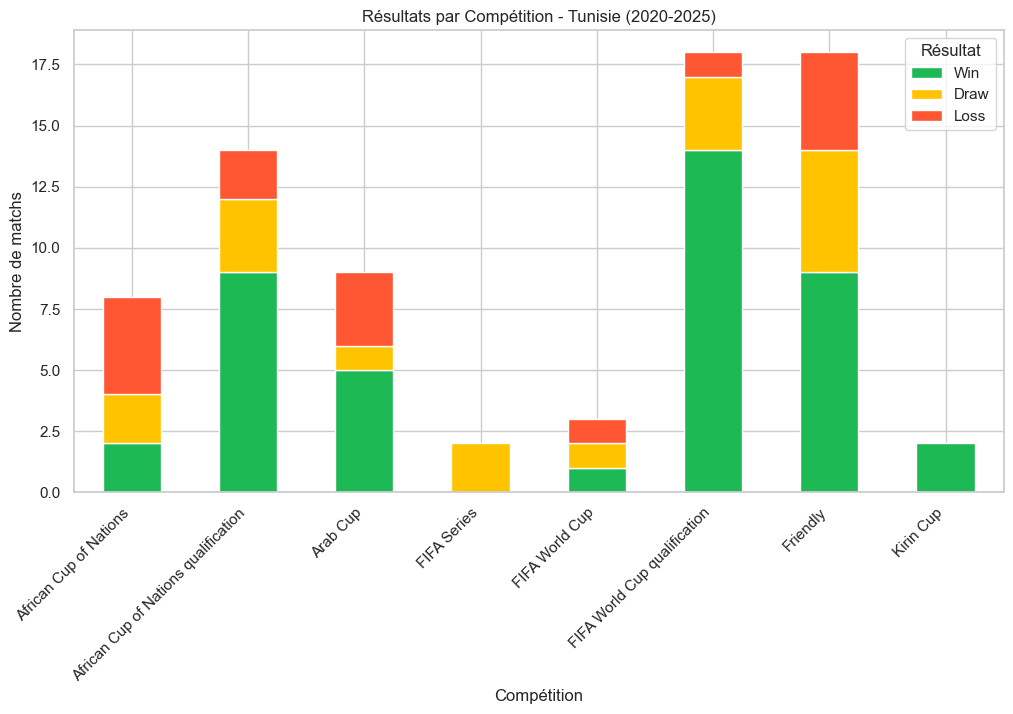

In [ ]:
results_by_comp = df_tunisie.groupby(['tournament', 'result']).size().unstack(fill_value=0)

results_by_comp[['Win','Draw','Loss']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['#1DB954','#FFC300','#FF5733']
)

plt.title("Résultats par Compétition - Tunisie (2020-2025)")
plt.xlabel("Compétition")
plt.ylabel("Nombre de matchs")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Résultat")
plt.show()


La Tunisie élève clairement son niveau lors des qualifications et compétitions officielles. Les amicaux sont bien plus irréguliers, ce qui peut impacter la préparation avant la CAN.

# Performance selon le lieu du match

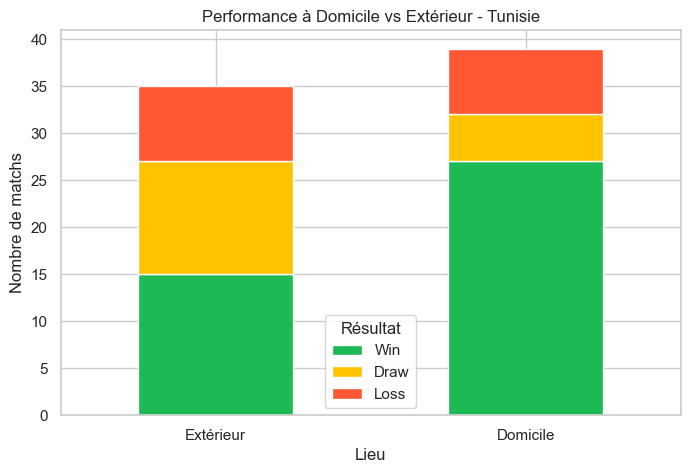

In [ ]:
df_tunisie['is_home'] = (df_tunisie['home_team'] == 'Tunisia').astype(int)

results_by_home = df_tunisie.groupby(['is_home', 'result']).size().unstack(fill_value=0)
results_by_home.index = ['Extérieur', 'Domicile']

results_by_home[['Win','Draw','Loss']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['#1DB954','#FFC300','#FF5733']
)

plt.title("Performance à Domicile vs Extérieur - Tunisie")
plt.xlabel("Lieu")
plt.ylabel("Nombre de matchs")
plt.legend(title="Résultat")
plt.xticks(rotation=0)
plt.show()


En analysant 2020–2025, la Tunisie est bien meilleure à domicile qu’à l’extérieur.


# Graphique des adversaires les plus affrontés

C:\Users\log\AppData\Local\Temp\ipykernel_10392\58140433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_opponents.index, y=top_opponents.values, palette="viridis")


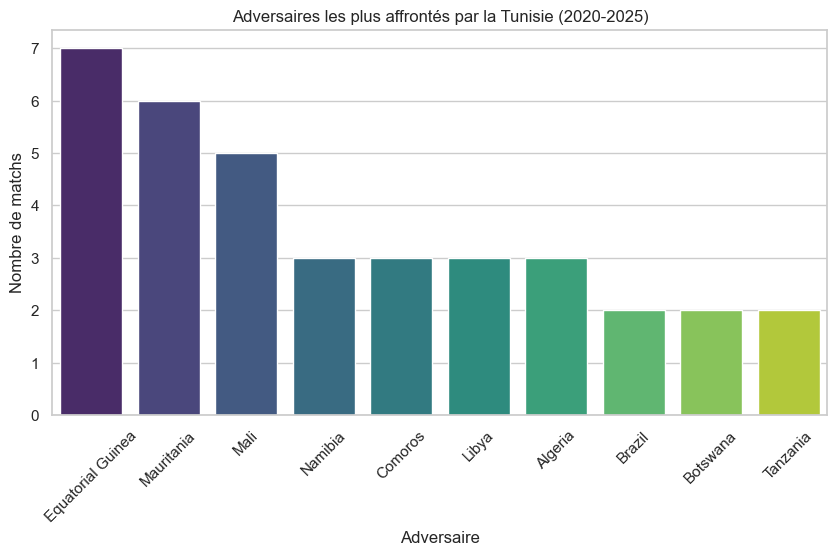

In [ ]:
df_tunisie['opponent'] = df_tunisie.apply(
    lambda row: row['away_team'] if row['home_team'] == 'Tunisia' else row['home_team'],
    axis=1
)

top_opponents = df_tunisie['opponent'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_opponents.index, y=top_opponents.values, palette="viridis")
plt.title("Adversaires les plus affrontés par la Tunisie (2020-2025)")
plt.xlabel("Adversaire")
plt.ylabel("Nombre de matchs")
plt.xticks(rotation=45)
plt.show()


# Feature Engineering

In [ ]:
# Tri chronologique
df_tunisie = df_tunisie.sort_values("date").reset_index(drop=True)

# Résultat codé en labels numériques
label_map = {"Loss": 0, "Draw": 1, "Win": 2}
df_tunisie["result_encoded"] = df_tunisie["result"].map(label_map)

# Forme récente : % de victoires sur les 5 derniers matchs AVANT
df_tunisie["form"] = df_tunisie["result"].eq("Win").shift(1).rolling(5).mean()

# Match à domicile ?
df_tunisie["is_home"] = (df_tunisie["home_team"] == "Tunisia").astype(int)

# Match officiel ?
df_tunisie["official"] = (df_tunisie["tournament"] != "Friendly").astype(int)

# Force de l’adversaire (proxy basée sur historique des buts marqués)
team_strength = df.groupby("home_team")["home_score"].mean()
df_tunisie["opponent"] = df_tunisie.apply(
    lambda row: row["away_team"] if row["home_team"] == "Tunisia" else row["home_team"],
    axis=1
)
df_tunisie["opponent_strength"] = df_tunisie["opponent"].map(team_strength)

# Match en Afrique ?
africa = ["Tunisia","Morocco","Algeria","Egypt","Senegal","Cameroon","Libya","Mali","Ghana","Ivory Coast"]
df_tunisie["in_africa"] = df_tunisie["country"].isin(africa).astype(int)

# Supprimer les premières lignes où rolling est NaN
df_tunisie = df_tunisie.dropna()


In [ ]:
from sklearn.model_selection import train_test_split

features = ["is_home", "form", "official", "opponent_strength", "in_africa"]
X = df_tunisie[features]
y = df_tunisie["result_encoded"]

# Split temporel : derniers 20% des matchs = test
train_size = int(len(df_tunisie)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Interprétation SHAP

In [ ]:
%pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    eval_metric="mlogloss"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print(" Macro F1:", round(f1_score(y_test, y_pred, average='macro')*100,2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 64.29 %
 Macro F1: 53.7 %

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.33      0.50         3
           2       0.78      0.78      0.78         9

    accuracy                           0.64        14
   macro avg       0.68      0.54      0.54        14
weighted avg       0.75      0.64      0.65        14



c:\Users\log\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\log\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


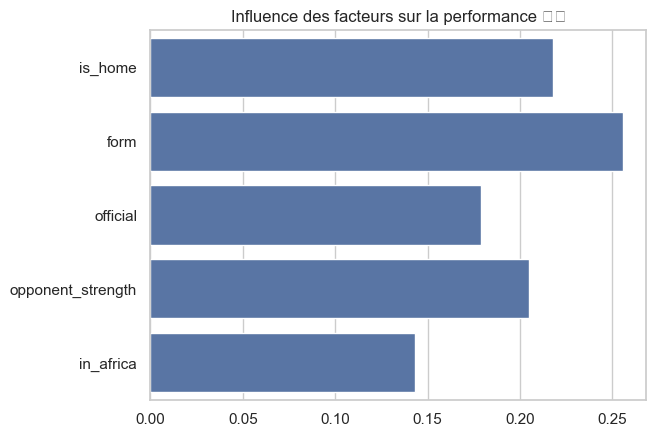

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Influence des facteurs sur la performance 🇹🇳")
plt.show()


In [ ]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#  Amélioration -> enrichir les features

In [ ]:
# Rolling offensif et défensif (5 matchs)
df_tunisie["goals_scored"] = df_tunisie.apply(
    lambda row: row["home_score"] if row["home_team"] == "Tunisia" 
    else row["away_score"], axis=1)

df_tunisie["goals_against"] = df_tunisie.apply(
    lambda row: row["away_score"] if row["home_team"] == "Tunisia" 
    else row["home_score"], axis=1)

df_tunisie["attack_5"] = df_tunisie["goals_scored"].shift(1).rolling(5).mean()
df_tunisie["defense_5"] = df_tunisie["goals_against"].shift(1).rolling(5).mean()

# Head-to-Head win rate vs l’adversaire
h2h = df_tunisie.groupby("opponent")["win"].mean()
df_tunisie["h2h_rate"] = df_tunisie["opponent"].map(h2h)

# Distance : domicile (0), Afrique (1), hors Afrique (2)
def travel_level(country):
    if country == "Tunisia":
        return 0
    elif country in africa:
        return 1
    return 2

df_tunisie["travel"] = df_tunisie["country"].apply(travel_level)

# Nettoyage après rolling
df_tunisie = df_tunisie.dropna()


KeyError: 'Column not found: win'

In [ ]:
features = [
    "is_home",
    "form",
    "official",
    "opponent_strength",
    "travel",
    "attack_5",
    "defense_5",
    "h2h_rate"
]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    eval_metric="mlogloss"
)

X = df_tunisie[features]
y = df_tunisie["result_encoded"]

train_size = int(len(df_tunisie)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("🔥 Macro F1:", round(f1_score(y_test, y_pred, average='macro')*100,2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 77.78 %
🔥 Macro F1: 74.07 %

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.67      0.67      0.67         3
           2       1.00      0.80      0.89         5

    accuracy                           0.78         9
   macro avg       0.72      0.82      0.74         9
weighted avg       0.83      0.78      0.79         9



# Visualisation des prédictions vs réalité

In [ ]:
compare_df = pd.DataFrame({
    "Date": df_tunisie["date"].iloc[train_size:].values,
    "Adversaire": df_tunisie["opponent"].iloc[train_size:].values,
    "Vrai": y_test.replace({0:"Loss",1:"Draw",2:"Win"}).values,
    "Prédit": pd.Series(y_pred).replace({0:"Loss",1:"Draw",2:"Win"}).values
})

print(compare_df)


        Date             Adversaire  Vrai Prédit
0 2025-09-08      Equatorial Guinea   Win    Win
1 2025-10-10  São Tomé and Príncipe   Win    Win
2 2025-10-13                Namibia   Win   Draw
3 2025-11-12             Mauritania  Draw   Draw
4 2025-11-14                 Jordan   Win    Win
5 2025-11-18                 Brazil  Draw   Loss
6 2025-12-01                  Syria  Loss   Loss
7 2025-12-04              Palestine  Draw   Draw
8 2025-12-07                  Qatar   Win    Win


C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 10004 (\N{HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\log\AppData\Local\Temp\ipykernel_7472\2129148532.py:29: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()


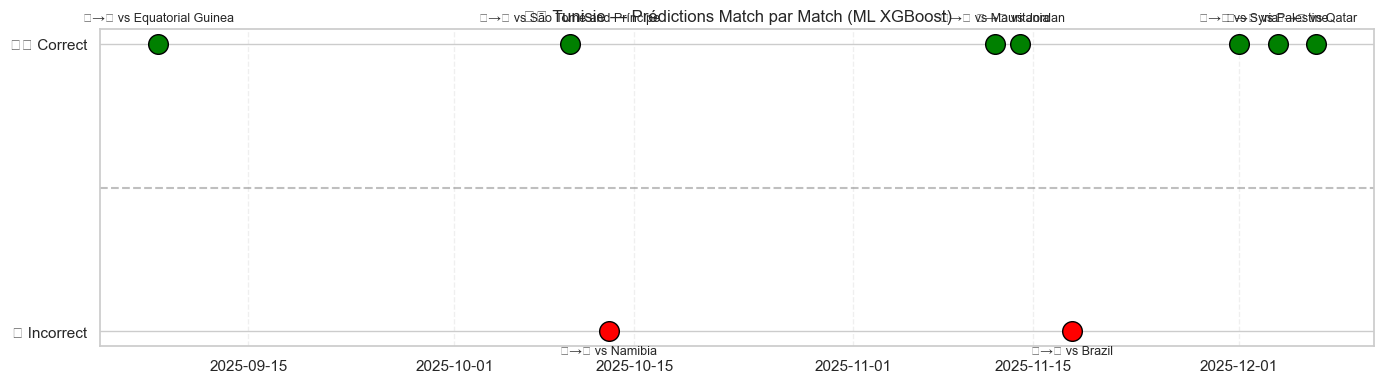

In [ ]:
plt.figure(figsize=(14,4))
for i in range(len(compare_df)):
    correct = compare_df["Correct"].iloc[i]
    date = compare_df["Date"].iloc[i]
    opponent = compare_df["Adversaire"].iloc[i]
    true = compare_df["Vrai_emoji"].iloc[i]
    pred = compare_df["Pred_emoji"].iloc[i]
    
    plt.scatter(
        date,
        correct,
        c="green" if correct else "red",
        s=200,
        edgecolors="black",
        linewidth=1
    )

    plt.text(
        date,
        correct + 0.08 if correct else -0.08,
        f"{true}→{pred} vs {opponent}",
        ha='center', fontsize=9
    )

plt.axhline(0.5, linestyle="--", color="gray", alpha=0.5)
plt.yticks([0,1], ["❌ Incorrect", "✔️ Correct"])
plt.title("🇹🇳 Tunisie — Prédictions Match par Match (ML XGBoost)")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


# Explication du modèle avec SHAP